In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Preparing Dataset

In [3]:
dataset_path = "animals"
width = height = 224

idg = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2,

    # data augmentation
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,

)

dataset_train = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    # save_to_dir="dataset/animals_augmentation",
    subset="training",
    target_size=(width, height)
)

dataset_validation = idg.flow_from_directory(
    dataset_path,
    shuffle=False,
    subset="validation",
    target_size=(width, height)
)

Found 1042 images belonging to 5 classes.
Found 257 images belonging to 5 classes.


### Create Model

In [9]:
base_model = tf.keras.applications.MobileNetV2()

In [ ]:
base_model.summary()

In [10]:
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",     #Transfer Learning
    input_shape=(width, height, 3),
    pooling="avg"
)

In [11]:
for layer in base_model.layers[0:-4]:
    layer.trainable=False

In [ ]:
base_model.summary()

In [15]:
model = Sequential([
    base_model,
    layers.Dense(5, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,264,389 (8.64 MB)

 Trainable params: 418,565 (1.60 MB)

 Non-trainable params: 1,845,824 (7.04 MB)

In [18]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=RMSprop(learning_rate=1e-4),      #0.0001
    metrics=['accuracy']
)

In [19]:
history = model.fit(dataset_train,
                    validation_data=dataset_validation,
                    epochs=20,
                    )

Epoch 1/20


d:\Program Files\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.6809 - loss: 0.9461 - val_accuracy: 0.9533 - val_loss: 0.2319
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9474 - loss: 0.2345 - val_accuracy: 0.9844 - val_loss: 0.1340
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9667 - loss: 0.1234 - val_accuracy: 0.9689 - val_loss: 0.1034
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9776 - loss: 0.0840 - val_accuracy: 0.9805 - val_loss: 0.0863
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9830 - loss: 0.0693 - val_accuracy: 0.9611 - val_loss: 0.0919
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.9894 - loss: 0.0595 - val_accuracy: 0.9844 - val_loss: 0.0538
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9876 - loss: 0.0443 - val_accuracy: 0.9805 - val_loss: 0.0716
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.9923 - loss: 0.0376 - val_accuracy: 0.9883 - val_loss: 0.0482
Epo

In [20]:
loss , accuracy = model.evaluate(dataset_validation)
print("validation loss:" , loss)
print("validation accuracy:" ,accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9868 - loss: 0.0398
validation loss: 0.03647027164697647
validation accuracy: 0.9883268475532532


In [22]:
model.save("weights/5_animals_weights_tl.h5")
model.save("weights/5_animals_weights_tl.keras")

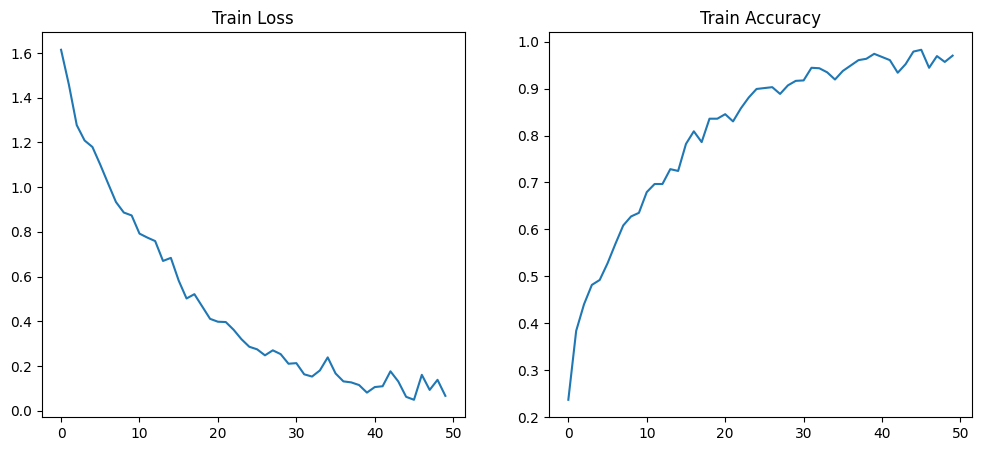

In [23]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(history.history['loss'])
ax1.set_title("Train Loss")
ax2.plot(history.history['accuracy'])
ax2.set_title("Train Accuracy")
plt.show()

In [7]:
model = tf.keras.models.load_model('weights/5_animals_weights_tl.h5')

In [8]:
y_pred = model.predict(dataset_validation)
y_predict = np.argmax(y_pred , axis=1)

d:\Program Files\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step


In [25]:
y_pred

array([[9.9999261e-01, 5.3316526e-06, 5.8449094e-09, 8.7660403e-08,
        2.0711593e-06],
       [9.9341923e-01, 6.4182053e-03, 6.9617986e-06, 1.4611383e-04,
        9.4279312e-06],
       [9.3923265e-01, 1.9572435e-02, 8.5387501e-04, 3.9956264e-02,
        3.8483361e-04],
       ...,
       [5.4221709e-06, 3.9283491e-06, 5.0864612e-05, 6.0872448e-05,
        9.9987888e-01],
       [1.4049983e-06, 1.6652368e-06, 1.6235350e-05, 9.6575991e-07,
        9.9997973e-01],
       [2.4007056e-07, 7.1602926e-08, 3.6634887e-07, 3.7899463e-06,
        9.9999559e-01]], dtype=float32)

In [26]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [27]:
dataset_validation.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

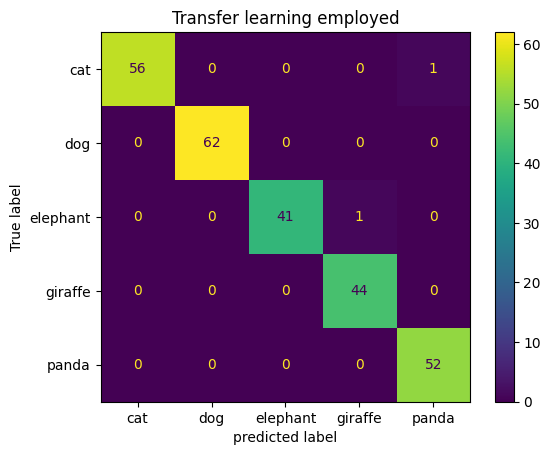

In [11]:
from sklearn import metrics
confusion_mat = metrics.confusion_matrix(dataset_validation.classes, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, 
                                            display_labels = ['cat', 'dog', 'elephant', 'giraffe', 'panda'])
cm_display.plot()
plt.title("Transfer learning employed")
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()

### inference code:

In [34]:
dataset_train.class_indices

{'cat': 0, 'dog': 1, 'elephant': 2, 'giraffe': 3, 'panda': 4}

In [33]:
import cv2

image = cv2.imread("giraffe_image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image , (224, 224))
image = image // 255.0
image = image.reshape(1, 224, 224, 3)

output = model.predict(image)
predicted_class = np.argmax(output)

if predicted_class == 0:
    print("🐱")
elif predicted_class == 1:
    print("🐶")
elif predicted_class == 2:
    print("🐘")  
elif predicted_class == 3:
    print("🦒")
elif predicted_class == 4:
    print("🐼")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
🐼
